Keep the file safe, we will try to use this same dataset to do image analysis.
--Regards,
Amit

In [29]:
!pip install mlxtend
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pd.read_csv('images.csv')
print(data.head())

labels = pd.read_csv('labels.csv', header= None)
print(labels.head())

   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.608  0.609  0.610  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.611  0.612  0.613  0.614  0.615  0.616  0.617  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 784 columns]
   0
0  5
1  0
2  4
3  1
4  9


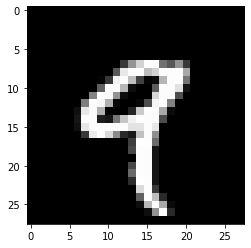

In [12]:
im= data.iloc[[3]].to_numpy().reshape(28,28)
plt.imshow(im, cmap='gray')

In [30]:
from sklearn.datasets import fetch_openml

mnist= fetch_openml('mnist_784')
X,y= mnist['data'], mnist['target']

(784,)


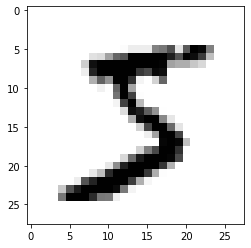

In [35]:
digit_test= X.iloc[0]
print(digit_test.shape) ##the digit is in a single Row with 784 cols.
digit_test_image= digit_test.to_numpy().reshape(28,28)## Reshaping it to 28*28

plt.imshow(digit_test_image, cmap=matplotlib.cm.binary, interpolation='nearest')

In [38]:
y[0]

'5'

In [39]:

from sklearn.preprocessing import StandardScaler
x1 = StandardScaler().fit_transform(X)
#y1 = StandardScaler().fit_transform(y)


In [54]:
# Let us view entire possible transformtion for df under consideration
from sklearn.decomposition import PCA
pca = PCA(n_components = .90)
principalComponents = pca.fit_transform(X)

In [55]:
type(principalComponents)

numpy.ndarray

In [56]:
PC_df = pd.DataFrame(data = principalComponents)
PC_df.head()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,122.255255,-316.233844,-51.131831,-556.897988,-49.210119,-217.069322,233.713325,188.824032,-358.798925,203.545001,...,-45.653172,-31.526108,-43.566231,39.919409,-98.042117,16.342269,54.018193,-29.964339,-20.791397,-148.417136
1,1010.494003,-289.963621,576.120745,-485.083384,-841.478355,-145.467158,-48.333388,-102.231088,34.786211,151.265038,...,-3.456519,-84.986441,67.293515,-30.983509,-26.328600,50.589361,-74.765745,-23.570446,-59.865074,-14.457819
2,-58.995947,393.697445,-161.998184,529.220866,-313.159323,8.970184,-860.990143,374.289391,-78.501242,-192.717658,...,167.968010,24.095042,-233.929317,168.677665,-56.690129,-130.293115,-119.288383,45.282899,3.167758,24.796799
3,-796.965019,-607.421250,295.522702,109.112831,25.666331,697.859150,-474.507968,-99.776449,298.602425,4.532776,...,-15.717553,-30.947435,6.881729,-20.017671,31.590673,15.681150,-91.427417,-3.750082,5.873136,24.058234
4,-391.318921,729.804185,13.906964,-242.894182,98.772991,35.925878,-87.458146,-415.778351,200.297865,106.207817,...,-5.953471,52.658138,27.060950,111.515773,-55.370300,19.103937,-77.368490,-49.303936,-51.819421,9.866342


In [57]:
#Inverse Transform on PC_DF data.
principalComponents_Inverse= pca.inverse_transform(principalComponents)
##Performing Inverse Transform to get back the Original Set of Data from the Dimentionally Reduced data.
#We will get back to the original columns and try to generate its original values(approx) from the 90% PCA defined columns. (39 Columns)

In [58]:
principalComponents_Inverse.shape

(70000, 784)

In [59]:
PC_df_Inverse = pd.DataFrame(data = principalComponents_Inverse)##Setting the NDarray to a dataframe.
PC_df_Inverse.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,1.386749e-14,-2.894877e-13,6.407971e-13,3.522796e-14,-2.172490e-13,3.070224e-14,1.591237e-13,-1.085206e-13,-3.528827e-14,-1.039542e-14,...,-0.729594,-0.436998,-0.166402,-0.062851,-0.015626,-0.001105,0.0,0.0,0.0,0.0
1,1.834033e-15,3.282982e-13,2.317628e-13,5.676196e-14,-2.143701e-13,-2.403921e-15,-2.049491e-13,2.520154e-14,1.027674e-13,5.519699e-14,...,0.148194,0.114557,0.101829,0.052163,0.146009,0.035501,0.0,0.0,0.0,0.0
2,8.026328e-16,8.787575e-14,-1.663825e-13,-6.746713e-14,-1.312416e-13,-1.765380e-13,6.478450e-14,-9.617171e-14,3.016414e-14,-4.883658e-15,...,5.924608,3.217010,1.180797,0.233034,0.080225,0.014390,0.0,0.0,0.0,0.0
3,-6.109776e-16,1.477426e-13,1.965066e-13,-8.207039e-14,1.061822e-14,-9.414536e-14,-1.678670e-13,-2.732034e-14,3.127806e-14,-7.310495e-14,...,0.352664,0.110344,0.038463,0.005602,0.010635,0.001845,0.0,0.0,0.0,0.0
4,-6.740211e-16,1.413321e-13,-7.799232e-14,1.623259e-14,-1.731417e-13,1.762649e-13,4.799994e-14,1.908550e-13,-7.930444e-14,4.229005e-14,...,0.127595,-0.225664,-0.216409,-0.082821,-0.117667,-0.007863,0.0,0.0,0.0,0.0


In [60]:
digit_test_Inverse=principalComponents_Inverse[0]
print(digit_test_Inverse.shape) ##Original columns are retrivied and its approximate values are predicted from the 50% PCA generated columns(39 columns)
digit_test_image_Inverse= digit_test_Inverse.reshape(28,28) ## Reshaping it to 28*28 matrix so as to get a pictorial view of the data.
type(digit_test_image_Inverse)

(784,)


numpy.ndarray

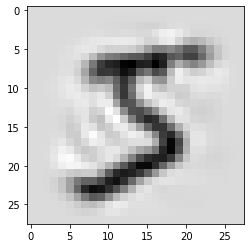

In [61]:
plt.imshow(digit_test_image_Inverse, cmap=matplotlib.cm.binary, interpolation='nearest') ## Predicting the data after inverse Transform.